# Features (columns) in data

1. ID: Customer ID
2. Age: Customer's age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer
5. ZIP Code: Home Address ZIP code.
6. Family: Family size of the customer
7. CCAvg: Avg. spending on credit cards per month
8. Education: Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional
9. Mortgage: Value of house mortgage if any.
10. Personal Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities Account: Does the customer have a securities account with the bank?
12. CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Does the customer use internet banking facilities?
14. Credit card: Does the customer use a credit card issued by the bank?

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [44]:
bank_df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
'''https://www.kaggle.com/pritech/bank-personal-loan-modellingthera-bank'''
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [45]:
bank_df.shape

(5000, 14)

In [46]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [47]:
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [48]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [49]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Data Visulization

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


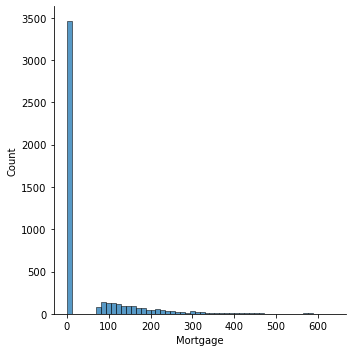

In [51]:
sns.displot(bank_df['Mortgage'])

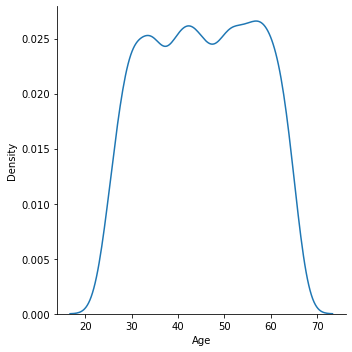

In [52]:
sns.displot(bank_df['Age'], kind='kde')

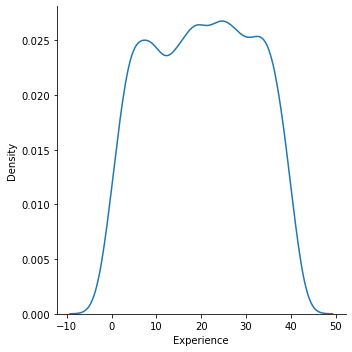

In [54]:
sns.displot(bank_df['Experience'], kind='kde')

So Mortgage has maximum values as 0

ZIP Code is of some particular area.

Expirence and Age are uniformly distributed.

### Countplot

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

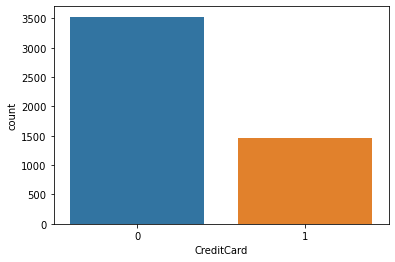

In [55]:
sns.countplot(x = bank_df['CreditCard'])

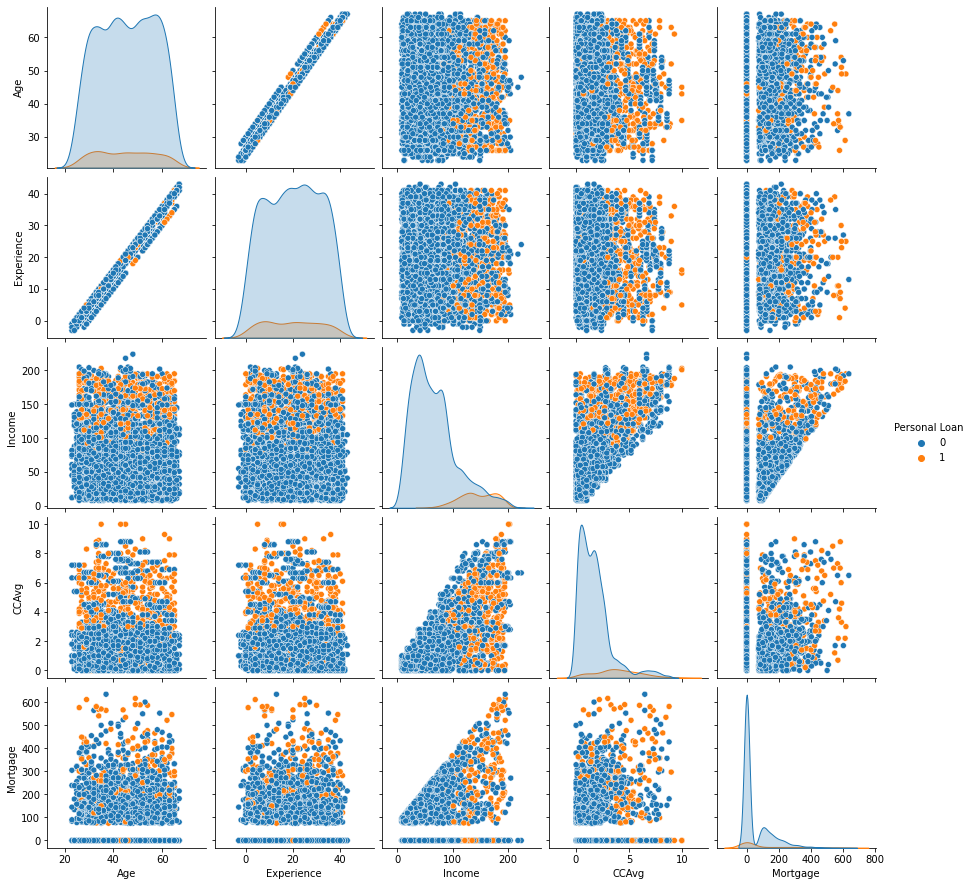

In [56]:
sns.pairplot(bank_df,
    x_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],
    y_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],
             diag_kind="kde",hue="Personal Loan")
plt.show()

In [14]:
#age and experience seem to be correlated
bank_df.drop('Experience',axis=1,inplace=True)

# Train Test split

In [15]:
X = bank_df.drop(['ZIP Code','ID','Personal Loan'], axis=1)

y = bank_df['Personal Loan']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [17]:
X_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4966,41,34,1,0.7,1,143,0,0,0,0
4086,50,11,4,0.2,1,0,1,0,0,0
2881,49,55,4,0.1,3,0,0,0,1,0
1237,38,169,1,6.8,3,0,0,1,1,1
1429,31,35,1,0.6,3,171,0,0,0,0


# Decision Tree Classifier

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [20]:
tree_score=f1_score(y_test,y_test_pred)
tree_score

0.9113924050632911

In [21]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[3178,    0],
       [   0,  322]], dtype=int64)

In [22]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9813333333333333


array([[1328,   14],
       [  14,  144]], dtype=int64)

In [23]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1342
           1       0.91      0.91      0.91       158

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [24]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_1 <= 104.50
|   |--- feature_3 <= 2.95
|   |   |--- class: 0
|   |--- feature_3 >  2.95
|   |   |--- feature_1 <= 92.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_3 <= 3.65
|   |   |   |   |   |--- feature_5 <= 216.50
|   |   |   |   |   |   |--- feature_1 <= 82.50
|   |   |   |   |   |   |   |--- feature_0 <= 32.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  32.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 36.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 71.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_1 >  71.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  36.50
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 3.35
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   | 

In [25]:
X.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


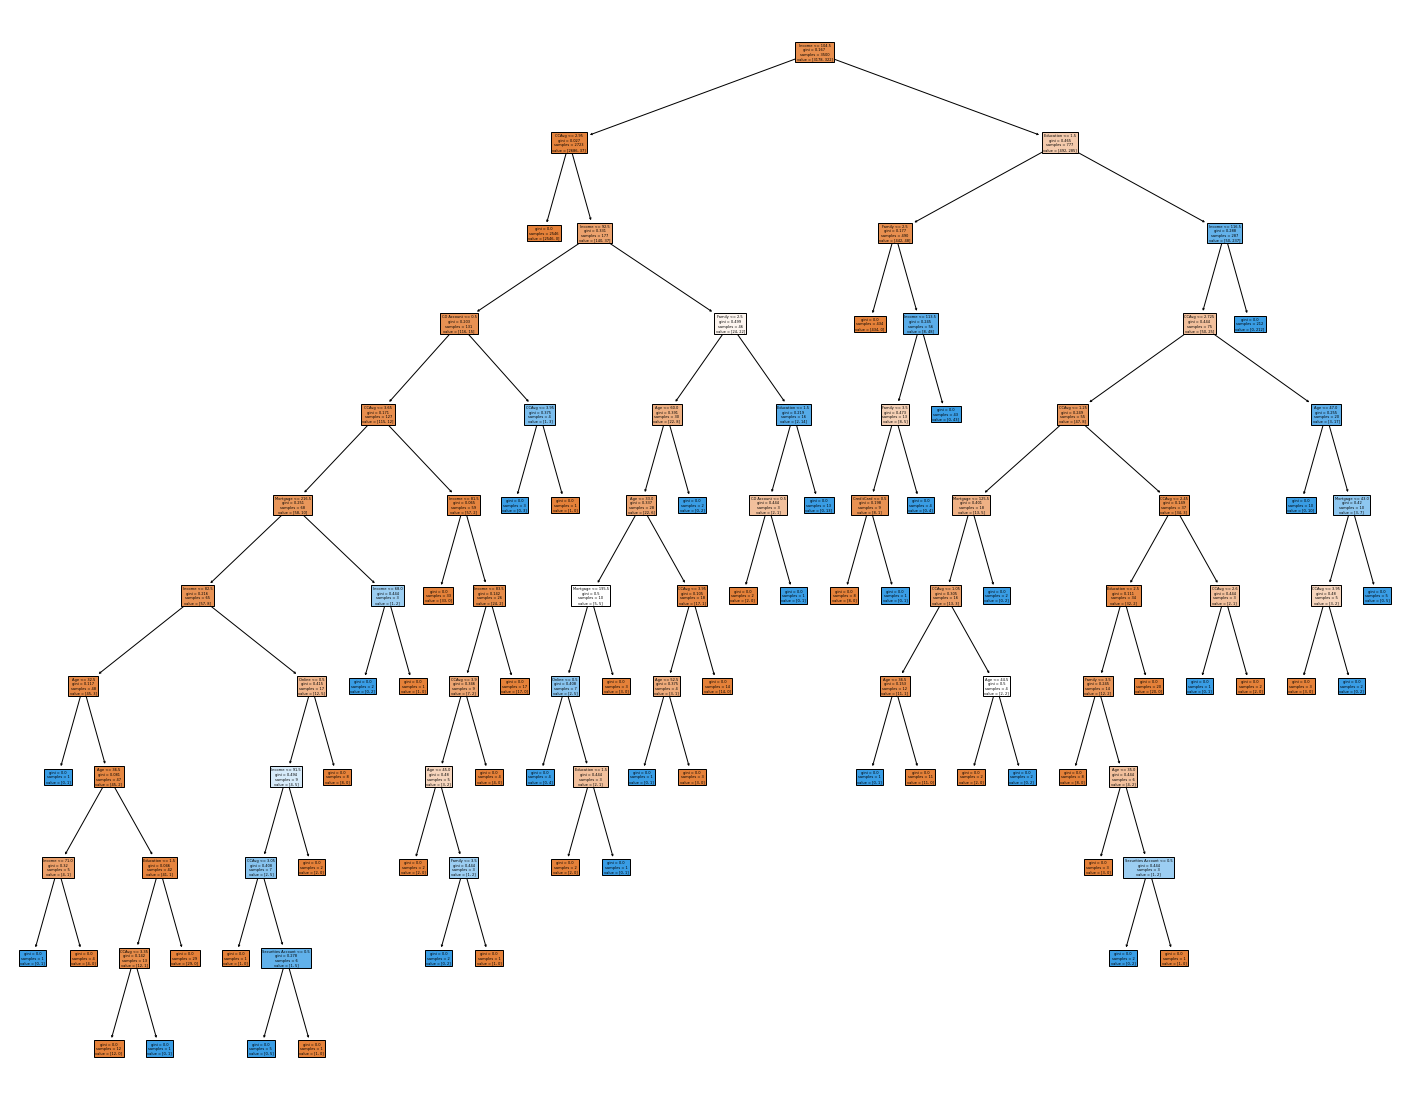

In [26]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=X.columns, filled=True)

In [27]:
y_train.value_counts()

0    3178
1     322
Name: Personal Loan, dtype: int64

In [28]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1342
           1       0.91      0.91      0.91       158

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [29]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [30]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8973333333333333


In [32]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.10126582278481013


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1342
           1       0.57      0.10      0.17       158

    accuracy                           0.90      1500
   macro avg       0.74      0.55      0.56      1500
weighted avg       0.87      0.90      0.86      1500



In [34]:
confusion_matrix(y_test, y_test_pred)

array([[1328,   14],
       [  14,  144]], dtype=int64)